In [1]:
import numpy as np
import sys
sys.path.append('./ckplotlib/')
import map_funcs
from IPython.display import Image
#
import Nio

1.6.1


In [2]:
## set paths
ctrl_paths = '/gpfs/fs1/scratch/dlawren/archive/b.e20.B1850.f09_g17.pi_control.all.297/lnd/hist/'
hico2_paths = '/glade/scratch/dlawren/archive/b.e20.B1850.f09_g17.pi_control.all.297_4xCO2/lnd/proc/'
loweredco2_paths = '/gpfs/fs1/p/cgd/ccr/CESM2_2X-4XCO2_runs/lnd/'

## load datasets
ctrl_lastyear = Nio.open_file(ctrl_paths+'b.e20.B1850.f09_g17.pi_control.all.297.clm2.h0.0230-12.nc')
hico2_4x_totecosysc_firstyears = Nio.open_file(hico2_paths+'b.e20.B1850.f09_g17.pi_control.all.297_4xCO2.clm2.h0.TOTECOSYSC.000101-020312.nc.nc')
loweredco2_4x_y200_totecosysc = Nio.open_file(loweredco2_paths+'b.e20.B1850.f09_g17.4xCO2_to_PI_yr200.001.clm2.h0.TOTECOSYSC.020001-030412.nc')

## get lat/lon and shape data
lats = loweredco2_4x_y200_totecosysc.variables['lat'][:]
lons = loweredco2_4x_y200_totecosysc.variables['lon'][:]
IM=len(lons)
JM=len(lats)

nts_hico2_firstyears = hico2_4x_totecosysc_firstyears.variables['TOTECOSYSC'].shape[0]
nts_loweredco2 = loweredco2_4x_y200_totecosysc.variables['TOTECOSYSC'].shape[0]

nyears_hico2_firstyears = nts_hico2_firstyears/12
nyears_loweredco2 = nts_loweredco2/12

print(hico2_4x_totecosysc_firstyears.variables['TOTECOSYSC'].shape)
print(loweredco2_4x_y200_totecosysc.variables['TOTECOSYSC'].shape)

print(nyears_hico2_firstyears)
print(nyears_loweredco2)


(2436, 192, 288)
(1260, 192, 288)
203.0
105.0


In [3]:
nyears_highco2 = 200
nyears_loweredco2 = int(nyears_loweredco2)
ctrl_totecosysc = ctrl_lastyear.variables['TOTECOSYSC']

timeseries_totecosysc = np.ma.masked_all([nyears_highco2+nyears_loweredco2,JM,IM])
timeseries_totecosysc[0:nyears_highco2,:,:] = hico2_4x_totecosysc_firstyears.variables['TOTECOSYSC'][:12*nyears_highco2:12,:,:]

In [4]:
timeseries_totecosysc[nyears_highco2:nyears_highco2+nyears_loweredco2,:,:] = loweredco2_4x_y200_totecosysc.variables['TOTECOSYSC'][:12*nyears_loweredco2:12,:,:]

print(ctrl_totecosysc.shape)
print(timeseries_totecosysc.shape)

(1, 192, 288)
(305, 192, 288)


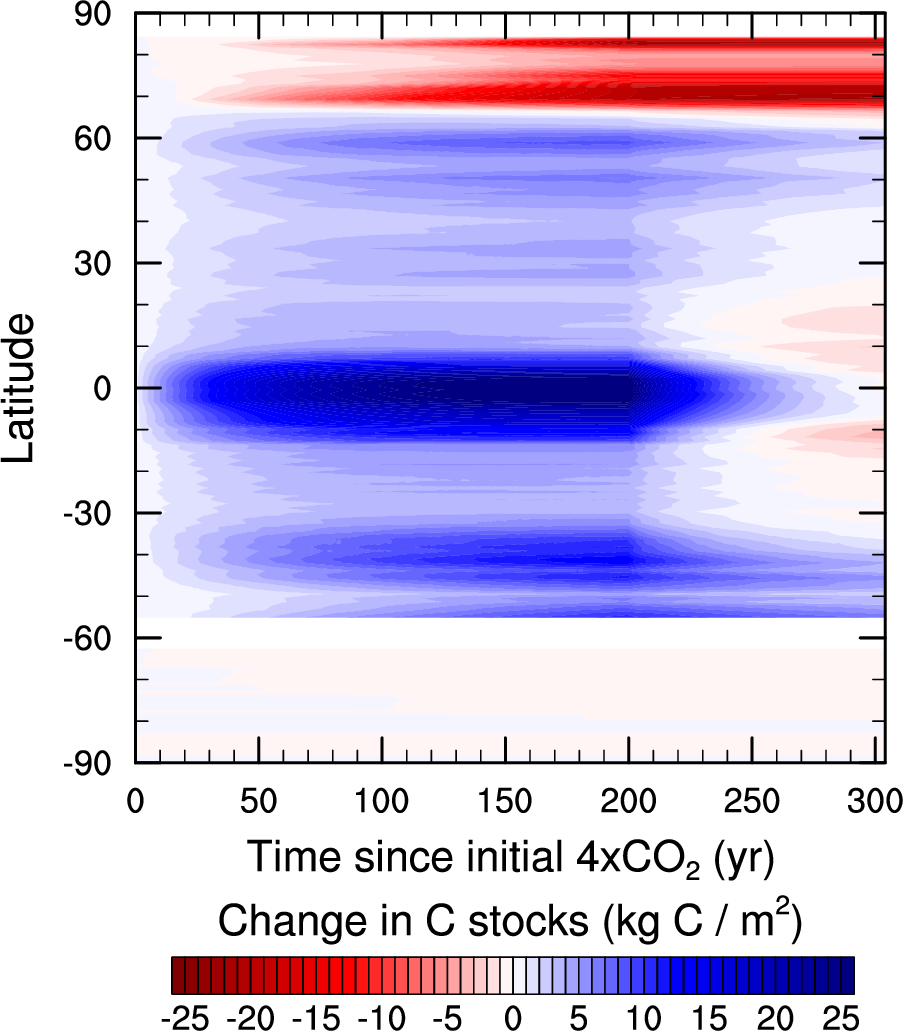

In [5]:
timeseries_delta_totecosysc_zonalmean = 1.e-3 * (timeseries_totecosysc.mean(axis=2) - ctrl_totecosysc[:].mean(axis=2)[0,:])
map_funcs.fill_nomap(timeseries_delta_totecosysc_zonalmean.transpose(), np.arange(nyears_highco2+nyears_loweredco2),lats, file='zonalmean_ecosysc_change',colormap='BlWhRe',reverse_colors=True,subtitle='Change in C stocks (kg C / m~S~2~N~)',levels=np.arange(51)-25.,xtitle='Time since initial 4xCO~B~2~N~ (yr)',ytitle='Latitude')
map_funcs.pdf_to_png('zonalmean_ecosysc_change',density=200)
Image('zonalmean_ecosysc_change.png')                     